In [308]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.offline as pyo

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv


In [309]:
data = pd.read_csv('/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv')

In [310]:
data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


**Check Description of each column**

In [311]:
data['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [312]:
data.shape

(11507, 4)

In [313]:
data['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [314]:
data['Year'].min()

1960

In [315]:
data['Year'].max()

2016

**Analysing Arab World**

In [316]:
data_pr = data[data['Country Name'] == 'Arab World'] 

<Axes: xlabel='YEARS', ylabel='GDP'>

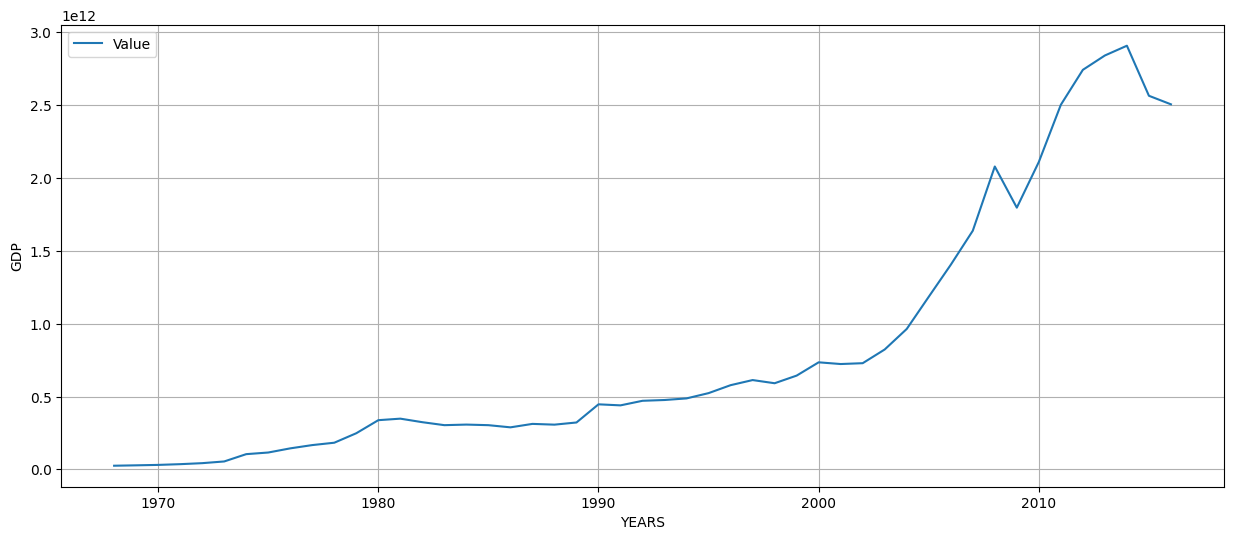

In [317]:
data_pr.plot(kind = 'line', x = 'Year', y = 'Value',
              figsize = (15,6), legend = True, grid = True,
               ylabel = 'GDP',
               xlabel = 'YEARS')

In [318]:
data_pr

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
5,Arab World,ARB,1973,5.501839e+10
6,Arab World,ARB,1974,1.051458e+11
7,Arab World,ARB,1975,1.163370e+11
8,Arab World,ARB,1976,1.448462e+11
9,Arab World,ARB,1977,1.673083e+11


**GDP Growth of a country**

In [319]:
round(((5501-4331)/4331)*102,2)

27.55

In [320]:
df = data_pr.values
gdp_change = [0]

for i in range(1, len(df)):
    prev = df[i-1][3]
    cur = df[i][3]
    
    gdp_change.append(round(((cur-prev)/prev)*100,2))

In [321]:
data_pr.assign(GDP = gdp_change)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


In [322]:
data.shape

(11507, 4)

In [323]:
final_data =[]
for country_name in data['Country Name'].unique():
    data_pr = data[data['Country Name'] == country_name]
    
    df = data_pr.values
    gdp_change = [0]
    
    for i in range(1, len(df)):
        prev = df[i-1][3]
        cur = df[i][3]
   
        gdp_change.append(round(((cur-prev)/prev)*100,2))
    
    data_pr = data_pr.assign(GDP = gdp_change)
    final_data.append(data_pr)

In [324]:
data = pd.concat(final_data,axis =0)

In [325]:
data.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [326]:
data.groupby('Country Name').max()['Value'].sort_values(ascending = False).head()

Country Name
World                        7.904923e+13
High income                  5.036240e+13
OECD members                 4.937008e+13
Post-demographic dividend    4.673504e+13
IDA & IBRD total             2.948247e+13
Name: Value, dtype: float64

In [327]:
data[data['Country Name'] =='Afghanistan']

,Country Name,Country Code,Year,Value,GDP
2306,Afghanistan,AFG,1960,5.377778e+08,0.00
2307,Afghanistan,AFG,1961,5.488889e+08,2.07
2308,Afghanistan,AFG,1962,5.466667e+08,-0.40
2309,Afghanistan,AFG,1963,7.511112e+08,37.40
2310,Afghanistan,AFG,1964,8.000000e+08,6.51
2311,Afghanistan,AFG,1965,1.006667e+09,25.83
2312,Afghanistan,AFG,1966,1.400000e+09,39.07
2313,Afghanistan,AFG,1967,1.673333e+09,19.52
2314,Afghanistan,AFG,1968,1.373333e+09,-17.93
2315,Afghanistan,AFG,1969,1.408889e+09,2.59


Plottng Graph using Plotly

In [328]:
data_pr = data[data['Country Name']=='World']
fig = px.line(data_pr, x= 'Year', y = 'Value', title = 'World GDP Analysis')
fig

In [329]:
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

In [330]:
data_pr = data[data['Country Name']=='India']
fig = px.line(data_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')

pyo.plot(fig, filename = 'India.html')

'India.html'

In [331]:
data_pr = data[data['Country Name']=='India']
fig = px.line(data_pr, x= 'Year', y= 'Value', title = 'Indian GDP Analysis')
fig

**Ploting in Bulk**

In [333]:
os.mkdir('GDP Individual')

for country_name in data['Country Name'].unique():
    data_pr = data[data['Country Name']==country_name]
    fig = px.line(data_pr, x= 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/'+country_name + '.html', auto_open = False)

FileExistsError: [Errno 17] File exists: 'GDP Individual'

**GDP Analysis across Countries**

In [334]:
c1 = data[data['Country Name'] == 'China']
c2 = data[data['Country Name']=='India']

data_pr = pd.concat([c1,c2], axis = 0)


In [335]:
fig = px.line(data_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & Chine', 
              color = 'Country Name')
pyo.plot(fig, filename = 'India&Chine.html', auto_open = False)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'India&Chine.html'

**GDP Comparison between Specific Countries**

In [336]:
lst = ['IND', 'ITA', 'USA', 'CNN']
dfs = []
for i in lst:
    dfs.append(data[data['Country Code']==i])
    
    df_pr = pd.concat(dfs, axis = 0)
    
fig = px.line(df_pr, x= 'Year', y = 'Value', 
             title = 'GDP Comparison-'+ '|'.join(lst), color = 'Country Name')
pyo.plot(fig, filename = '|'.join(lst)+'.html')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'IND|ITA|USA|CNN.html'

In [339]:
def compare_gdp(lst, isOpen):
    dfs = []
    for i in lst:
        dfs.append(data[data['Country Code']==i])
        df_pr = pd.concat(dfs, axis =0)
        
    fig = px.line(df_pr, x= 'Year', y = 'Value', title = 'GDP Comparison-'+'|'.join(lst))
    
    pyo.plot(fig, filename = '|'.join(lst)+'.html', auto_open = isOpen)

In [340]:
compare_gdp(['IND', 'USA'], False)

**GDP Growth Between 1960-2016**

In [341]:
dfs =[]

for country_name in data['Country Name'].unique():
    df_pr = data[data['Country Name']== country_name]
    
    if(len(df_pr)==57):
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis = 0)

In [342]:
fig = px.line(df_pr, x ='Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'GDP Growth.html'